In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Load the Excel spreadsheet
normal_filenames = glob.glob("./Online_data/Machinary_Fault_dataset/normal/normal/12.288.csv")
# abnormal_filename_6g = glob.glob("./Online_data/Machinary_Fault_dataset/imbalance/imbalance/6g/*.csv")
# abnormal_filename_10g = glob.glob("./Online_data/Machinary_Fault_dataset/imbalance/imbalance/10g/*.csv")
# abnormal_filename_15g = glob.glob("./Online_data/Machinary_Fault_dataset/imbalance/imbalance/15g/*.csv")
# abnormal_filename_20g = glob.glob("./Online_data/Machinary_Fault_dataset/imbalance/imbalance/20g/*.csv")
# abnormal_filename_25g = glob.glob("./Online_data/Machinary_Fault_dataset/imbalance/imbalance/25g/*.csv")
# abnormal_filename_30g = glob.glob("./Online_data/Machinary_Fault_dataset/imbalance/imbalance/30g/*.csv")
# abnormal_filename_35g = glob.glob("./Online_data/Machinary_Fault_dataset/imbalance/imbalance/35g/*.csv")

def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None,usecols=np.r_[2]) # Read only columns 1 to 6 which contains vibration data
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

data_norm = dataReader(normal_filenames)
# data_6g = dataReader(abnormal_filename_6g)
# data_10g = dataReader(abnormal_filename_10g)
# data_15g = dataReader(abnormal_filename_15g)
# data_20g = dataReader(abnormal_filename_20g)
# data_25g = dataReader(abnormal_filename_25g)
# data_30g = dataReader(abnormal_filename_30g)
# data_35g = dataReader(abnormal_filename_35g)
data_norm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   2       250000 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [20]:
def downSampler(data,a,b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = pd.DataFrame()
    x = b
    for i in range(int(len(data)/x)):
        data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
        a += x
        b += x
    return data_decreased

In [42]:
sampling_rate = 100
ds_normal_data = downSampler(data_norm, 0, sampling_rate)
# ds_6g_data = downSampler(data_6g, 0, sampling_rate)
# ds_10g_data = downSampler(data_10g, 0, sampling_rate)
# ds_15_data = downSampler(data_15g, 0, sampling_rate)
# ds_20_data = downSampler(data_20g, 0,sampling_rate)
# ds_25_data = downSampler(data_25g, 0, sampling_rate)
# ds_30_data = downSampler(data_30g, 0, sampling_rate)
# ds_35_data = downSampler(data_35g, 0, sampling_rate)

C:\Users\jared\AppData\Local\Temp\ipykernel_5024\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\jared\AppData\Local\Temp\ipykernel_5024\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\jared\AppData\Local\Temp\ipykernel_5024\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
C:\Users\jared\AppData\Local\Temp\ipykernel_5024\4262304092.py:10: FutureWarning: The frame.append method is deprecated and will be removed from 

In [34]:
print(ds_normal_data.shape)
print(data_norm.shape)

(250, 1)
(250000, 1)


In [35]:
from scipy import signal
def FFTConvolve(data):
    autocorr = signal.fftconvolve(data,data[::-1],mode='full')
    return pd.DataFrame(autocorr)

<AxesSubplot: >

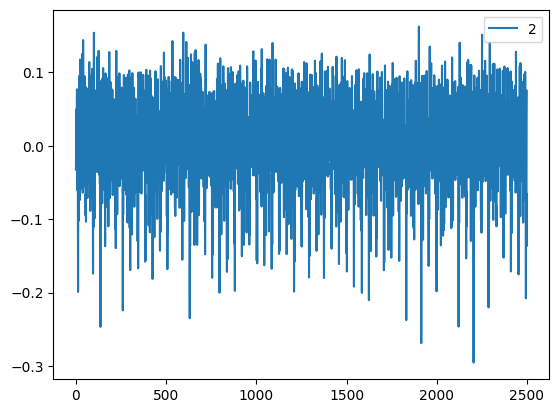

In [55]:
import numpy as np
import matplotlib.pyplot as plt

for i in ds_normal_data:
    i = abs(i)


# Time domain representation
ds_normal_data.plot()

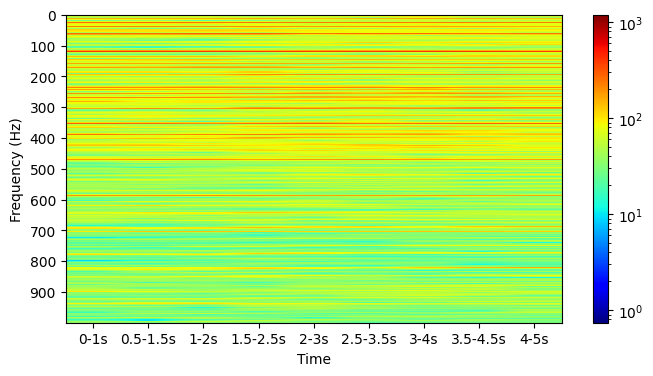

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from matplotlib.colors import LogNorm

# # Data should not be downsampled yet
# def FFT(data, samplingFrequency, normalized = True):
#   if (normalized):
#     fftData = np.fft.fft(data/len(data)) # Normalize amplitude
#   else:
#     fftData = np.fft.fft(data)

#   fftData = fftData[range(int(len(data)/2))] # Exclude sampling frequency

#   tpCount     = len(data)
#   values      = np.arange(int(tpCount/2))
#   timePeriod  = tpCount/samplingFrequency
#   frequencies = values/timePeriod
#   print("tpCount:",tpCount)
#   print("values:",values)
#   print("timePeriod:",timePeriod)
#   print("frequencies:",frequencies)
#   return frequencies, abs(fftData)

# def downSamplerTest(data,a,b):
#     """
#     data = data
#     a = start index
#     b = sampling rate
#     """
#     data_decreased = pd.DataFrame()
#     x = b
#     for i in range(int(len(data)/x)):
#         data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
#         a += x
#         b += x
#     return data_decreased

# samplingFrequency = 50000
# N = len(data_norm)
# xf = rfftfreq(data_norm.size, d=1/samplingFrequency)
# yf = rfft(data_norm)

# plt.plot(xf, np.abs(yf))
# plt.show()


# Generate sample data
fs = 50000  # Sampling frequency
t = np.arange(0, 5, 1/fs)  # Time vector
x = np.sin(2*np.pi*1000*t) + 0.5*np.sin(2*np.pi*2000*t)  # Sample signal

# Perform FFT
data = data_norm.squeeze()
data = np.array(data)
# print(touse.shape)
# print(touse)
# xf = rfft(touse)
# freqs = rfftfreq(len(touse), 1/fs)

# # Plot results
# plt.figure(figsize=(8, 4))
# plt.plot(freqs, np.abs(xf))
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude')
# plt.xlim(0, 1000)
# plt.ylim(0,10000)
# plt.grid()
# plt.show()


#heatmap
periods = [(0, 1), (0.5, 1.5), (1, 2), (1.5, 2.5), (2, 3), (2.5, 3.5), (3, 4), (3.5, 4.5), (4, 5)]

# Initialize empty heatmap array with correct number of columns
n_cols = len(data)//2 + 1
heatmap = np.zeros((len(periods), n_cols))

# Loop through time periods and perform FFT on each
for i, period in enumerate(periods):
    start, end = period
    idx_start = int(start * fs)
    idx_end = int(end * fs)
    x_period = data[idx_start:idx_end]
    xf = rfft(x_period)
    freqs = rfftfreq(len(x_period), 1/fs)
    heatmap[i, :len(xf)] = np.abs(xf)

t_axis = [f'{p[0]}-{p[1]}s' for p in periods]
f_axis = rfftfreq(n_cols*2-1, 1/fs)[:1000]  # only frequencies up to 1000 Hz

Vmin = heatmap[:, :1000].min()
Vmax = heatmap[:, :1000].max()

# Plot the heatmap
plt.figure(figsize=(8, 4))
plt.imshow(heatmap[:, :1000].T, cmap='jet', aspect='auto', norm=LogNorm(vmin=Vmin, vmax=Vmax))  # only plot up to 1000 Hz
plt.xticks(np.arange(len(t_axis)), t_axis)
plt.yticks(np.arange(0, 1000, 100), np.arange(0, 1000, 100))
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.show()



# norm_freq, norm_FFT  = FFT(data_norm, samplingFrequency, normalized=False)
# plt.plot(norm_freq, norm_FFT)
# print(norm_freq.shape)
# print(norm_freq)


# g6_freq, g6_FFT  = FFT(ds_6g_data, samplingFrequency, normalized=True)
# plt.plot(g6_freq, g6_FFT)
# print(g6_FFT.shape)

# samplingFrequency   = 50000
# samplingInterval       = 1 / samplingFrequency
# beginTime           = 0
# endTime             = 245
# signal1Frequency     = 10000
# time        = np.arange(beginTime, endTime, samplingInterval)
# amplitude1 = np.sin(2*np.pi*signal1Frequency*time)
# yf = rfft(amplitude1)
# xf = rfftfreq(amplitude1.size, d=1/samplingFrequency)
# plt.plot(xf, np.abs(yf))
# plt.show()

# # # print(amplitude1.shape)
# # dfam1 = pd.DataFrame(amplitude1)
# # dfam1 = downSampler(dfam1, 0, samplingFrequency)
# testfreq, testfft = FFT(amplitude1,samplingFrequency)
# print(testfreq)
# print("Time shape:",time.shape)
# print(testfft.shape)
# print(testfreq.shape)
# plt.plot(testfreq,testfft)

In [ ]:
data_n = FFTConvolve(ds_normal_data)
data_6g = FFTConvolve(ds_6g_data)
data_10g = FFTConvolve(ds_10g_data)
data_15g = FFTConvolve(ds_15_data)
data_20g = FFTConvolve(ds_20_data)
data_25g = FFTConvolve(ds_25_data)
data_30g = FFTConvolve(ds_30_data)
data_35g = FFTConvolve(ds_35_data)

In [ ]:
import numpy as np
y_1 = pd.DataFrame(np.ones(int(len(data_n)),dtype=int))
y_2 = pd.DataFrame(np.zeros(int(len(data_6g)),dtype=int))
y_3 = pd.DataFrame(np.full((int(len(data_10g)),1),2))
y_4 = pd.DataFrame(np.full((int(len(data_15g)),1),3))
y_5 = pd.DataFrame(np.full((int(len(data_20g)),1),4))
y_6 = pd.DataFrame(np.full((int(len(data_25g)),1),5))
y_7 = pd.DataFrame(np.full((int(len(data_30g)),1),6))
y = pd.concat([y_1,y_2,y_3,y_4,y_5,y_6,y_7], ignore_index=True)
y

In [ ]:
data = pd.concat([data_n,data_6g,data_10g,data_15g,data_20g,data_25g,data_30g],ignore_index=True)
data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, shuffle=True)

print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

In [ ]:
# from sklearn.svm import SVC
# svm = SVC(random_state = 1)
# svm.fit(X_train,y_train)
# print("SVM accuracy is {} on Train Dataset".format(svm.score(X_train,y_train)))
# print("SVM accuracy is {} on Test Dataset".format(svm.score(X_test,y_test)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors = k
knn.fit(X_train,y_train)
print("k={}NN Accuracy on Train Data: {}".format(3,knn.score(X_train,y_train)))
print("k={}NN Accuracy on Test Data: {}".format(3,knn.score(X_test,y_test)))

In [ ]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
early_stop = EarlyStopping(monitor='loss', patience=2)

# Initialising ANN model
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(11,),kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(7, activation='softmax',kernel_initializer='random_uniform'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [ ]:
hist = model.fit(X_train , y_train , epochs=500, validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()